<a href="https://colab.research.google.com/github/Sushila-Phogat/Data-science-with-Python/blob/master/Profusion_hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/Sushila-Phogat/Data-science-with-Python/master/hotel_bookings.csv')

df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [0]:
df=df[df['hotel']=='Resort Hotel']

In [18]:
df.groupby('is_canceled').size()

is_canceled
0    5147
1    2080
dtype: int64

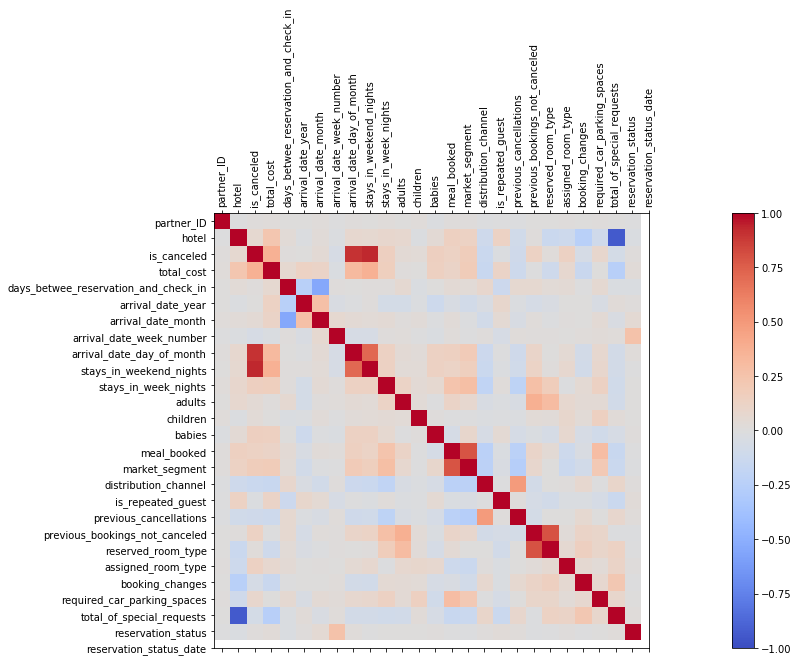

In [46]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
fig.set_size_inches(30,8)
plt.show()

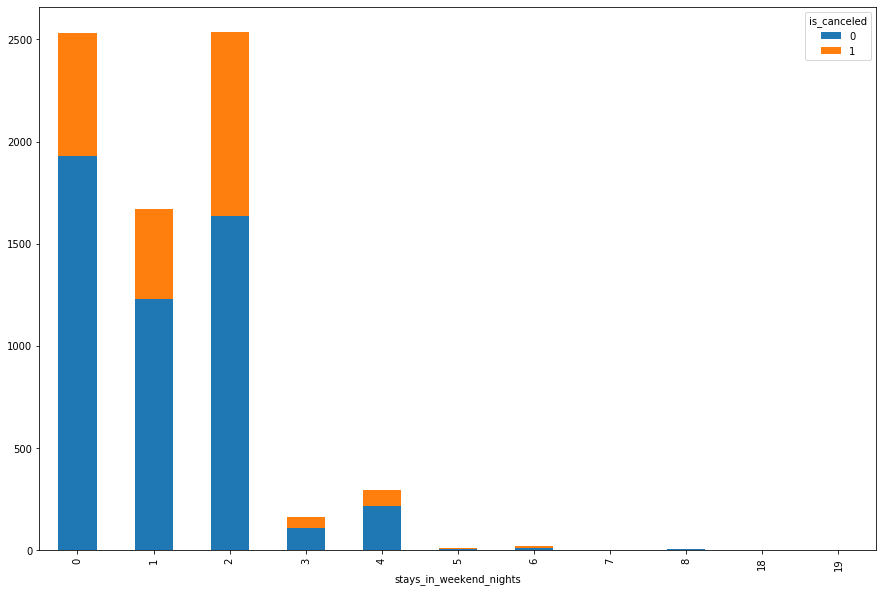

In [47]:

df.groupby(['stays_in_weekend_nights','is_canceled']).size().unstack().plot(kind='bar',stacked=True, figsize=(15,10))
plt.show()

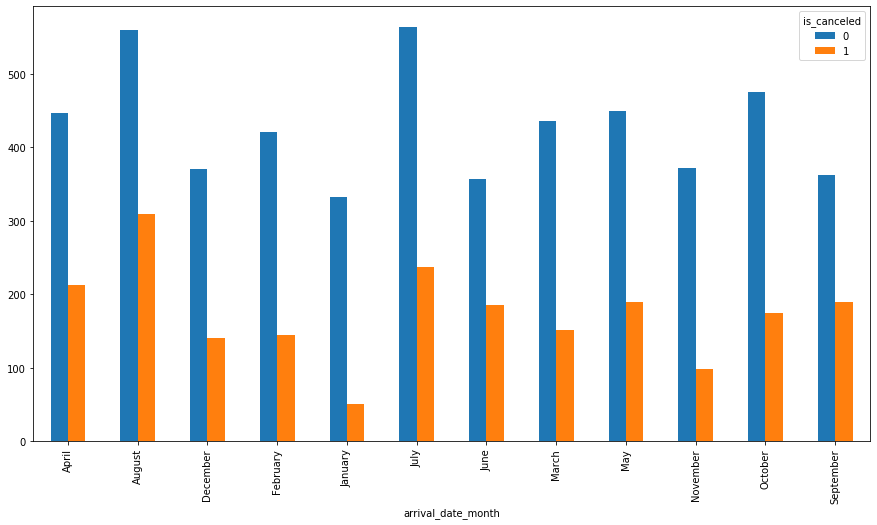

In [25]:
df.groupby(['arrival_date_month','is_canceled']).size().unstack().plot(kind='bar',stacked=False, figsize=(15,8))
plt.show()

In [26]:
df[df['is_canceled']==1]

,partner_ID,hotel,is_canceled,total_cost,days_betwee_reservation_and_check_in,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_booked,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,21,Resort Hotel,1,150,75,2015,July,27,1,0,3,2,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,D,D,0,0,0,Canceled,22/04/2015
7,27,Resort Hotel,1,150,63,2015,July,27,3,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,0,2,Canceled,18/06/2015
8,25,Resort Hotel,1,100,62,2015,July,27,3,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,D,D,0,0,1,Canceled,03/07/2015
14,19,Resort Hotel,1,1290,79,2015,July,27,3,6,15,2,1.0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,A,0,0,2,Canceled,15/04/2015
20,3,Resort Hotel,1,50,33,2015,July,27,4,0,1,2,0.0,0,BB,Online TA,TA/TO,0,0,0,D,D,0,0,0,Canceled,16/06/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,26,Resort Hotel,1,50,0,2016,March,12,18,0,1,1,0.0,0,BB,Corporate,Corporate,1,0,1,A,A,0,0,0,Canceled,18/03/2016
4723,3,Resort Hotel,1,100,16,2016,September,39,21,0,1,1,0.0,0,BB,Corporate,Corporate,1,3,2,E,E,0,0,0,Canceled,06/09/2016
4724,13,Resort Hotel,1,50,5,2016,October,42,12,0,1,1,0.0,0,BB,Corporate,Corporate,1,4,2,E,E,0,0,0,Canceled,07/10/2016
5369,16,Resort Hotel,1,90,1,2016,October,45,30,1,0,2,0.0,0,BB,Direct,Direct,0,0,0,A,A,0,0,0,No-Show,30/10/2016


In [27]:
df.columns

Index(['partner_ID', 'hotel', 'is_canceled', 'total_cost',
       'days_betwee_reservation_and_check_in', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal_booked',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [28]:
from sklearn.preprocessing import LabelEncoder
# convert a string variable to a categorical one
df[["arrival_date_month"]] = df[["arrival_date_month"]].apply(LabelEncoder().fit_transform)
df[["meal_booked"]] = df[["meal_booked"]].apply(LabelEncoder().fit_transform)
df[["market_segment"]] = df[["market_segment"]].apply(LabelEncoder().fit_transform)
df[["distribution_channel"]] = df[["distribution_channel"]].apply(LabelEncoder().fit_transform)
df[["reserved_room_type"]] = df[["reserved_room_type"]].apply(LabelEncoder().fit_transform)
df[["assigned_room_type"]] = df[["assigned_room_type"]].apply(LabelEncoder().fit_transform)
df[["reservation_status"]] = df[["reservation_status"]].apply(LabelEncoder().fit_transform)
df[["reservation_status_date"]] = df[["reservation_status_date"]].apply(LabelEncoder().fit_transform)

df

,partner_ID,hotel,is_canceled,total_cost,days_betwee_reservation_and_check_in,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_booked,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,25,Resort Hotel,0,50,7,2015,5,27,1,0,1,1,0.0,0,0,2,1,0,0,0,0,2,0,0,0,1,43
1,21,Resort Hotel,1,150,75,2015,5,27,1,0,3,2,0.0,0,2,4,2,0,0,0,2,3,0,0,0,0,596
2,18,Resort Hotel,0,430,127,2015,5,27,1,2,5,2,0.0,0,2,4,2,0,0,0,2,8,0,0,1,1,14
3,2,Resort Hotel,0,910,95,2015,5,27,1,4,11,2,0.0,0,0,4,2,0,0,0,2,3,0,0,0,1,434
4,18,Resort Hotel,0,240,36,2015,5,27,2,1,3,3,0.0,0,0,5,2,0,0,0,2,3,0,0,1,1,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7222,23,Resort Hotel,0,370,206,2017,1,35,31,2,4,3,0.0,0,0,2,1,0,0,0,2,3,0,1,1,1,166
7223,2,Resort Hotel,0,430,151,2017,1,35,31,2,5,2,0.0,0,0,2,1,0,0,0,0,0,0,0,0,1,193
7224,12,Resort Hotel,0,500,194,2017,1,35,31,2,5,2,1.0,0,2,5,2,0,0,0,5,6,3,1,1,1,193
7225,12,Resort Hotel,0,860,270,2017,1,34,25,4,10,2,0.0,0,2,4,2,0,0,0,2,3,0,0,0,1,221


In [0]:
features=[ 'total_cost',
       'days_betwee_reservation_and_check_in', 'arrival_date_year',
       'arrival_date_month',
        'stays_in_weekend_nights',
        'adults', 'children', 
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 
       'previous_cancellations','babies','reserved_room_type','previous_bookings_not_canceled','required_car_parking_spaces',
        'reservation_status_date']

# prepare train and target
data=df
data=data.drop(['stays_in_week_nights',  'assigned_room_type', 'booking_changes','meal_booked','total_of_special_requests','arrival_date_week_number','is_canceled','hotel','reservation_status','arrival_date_day_of_month','partner_ID'],axis=1)
target=df['is_canceled']

In [54]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn.ensemble import ExtraTreesClassifier

# prepare train and target
#data=df
#data=data.drop(['stays_in_week_nights','previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes','meal_booked','total_of_special_requests','arrival_date_week_number','required_car_parking_spaces','is_canceled','hotel','reservation_status','arrival_date_day_of_month','previous_cancellations','babies','partner_ID'],axis=1)
#target=df['is_canceled']
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes

clf = ExtraTreesClassifier(n_estimators=100, max_depth=4)
skf = StratifiedKFold(n_splits=10)
score=[]
for train,test in skf.split(data, target):
  clf.fit(data.iloc[train],target.iloc[train])
  y_pred=clf.predict(data.iloc[test])
  y_true=target[test]
  score.append(acc(y_true,y_pred))
score
# summarize the selection of the attributes

#print( rfe.ranking_)

[0.7123098201936376,
 0.7123098201936376,
 0.7123098201936376,
 0.7123098201936376,
 0.7123098201936376,
 0.7123098201936376,
 0.7123098201936376,
 0.7119113573407202,
 0.7119113573407202,
 0.7022160664819944]

[14  1  8  2  9 10  6 12  3  5  0  4 13 15 11  7]
Feature ranking:
1. previous_bookings_not_canceled (0.231886)
2. days_betwee_reservation_and_check_in (0.146441)
3. distribution_channel (0.144903)
4. arrival_date_year (0.128315)
5. is_repeated_guest (0.114949)
6. previous_cancellations (0.110020)
7. children (0.026201)
8. babies (0.024737)
9. arrival_date_month (0.024301)
10. adults (0.020627)
11. total_cost (0.008282)
12. stays_in_weekend_nights (0.006731)
13. reserved_room_type (0.005201)
14. required_car_parking_spaces (0.004049)
15. previous_cancellations (0.001853)
16. market_segment (0.001504)


(0, 0.4749642365842869)

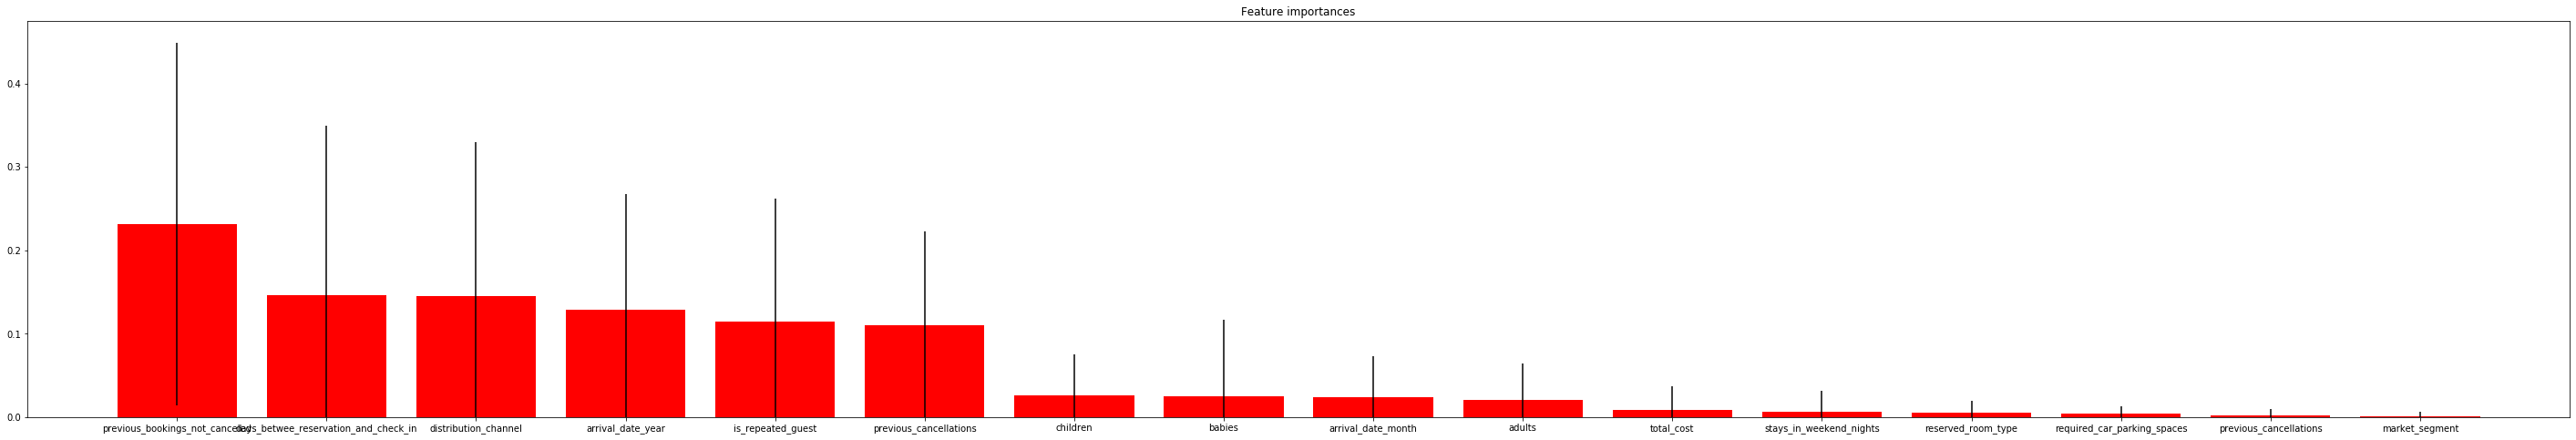

In [57]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(data.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(data.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data.shape[1]), np.array(features)[indices])
plt.xlim([-1, data.shape[1]])
fig.set_size_inches(50,8)
axes = plt.gca()
axes.set_ylim([0,None])

In [0]:
features2=[ 'is_canceled',
       'days_betwee_reservation_and_check_in', 'arrival_date_year',
       'arrival_date_month',
        'stays_in_weekend_nights',
        'adults', 'children', 
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 
       'previous_cancellations','babies','reserved_room_type','previous_bookings_not_canceled','required_car_parking_spaces',
        'reservation_status_date']

# prepare train and target
data2=df
data2=data2.drop(['stays_in_week_nights',  'assigned_room_type', 'booking_changes','meal_booked','total_of_special_requests','arrival_date_week_number','is_canceled','hotel','reservation_status','arrival_date_day_of_month','partner_ID'],axis=1)
target2=df['total_cost']

In [59]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes

clf = ExtraTreesClassifier(n_estimators=100, max_depth=4)
skf = StratifiedKFold(n_splits=10)
score=[]
for train,test in skf.split(data2, target2):
  clf.fit(data2.iloc[train],target2.iloc[train])
  y_pred=clf.predict(data2.iloc[test])
  y_true=target2[test]
  score.append(acc(y_true,y_pred))
score

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.20608575380359612,
 0.23374827109266944,
 0.21715076071922546,
 0.2074688796680498,
 0.20885200553250347,
 0.19778699861687413,
 0.20885200553250347,
 0.21745152354570638,
 0.21052631578947367,
 0.22437673130193905]

[ 4  0  1 14  8  9  5 10 13  3 11 12  2 15  6  7]
Feature ranking:
1. stays_in_weekend_nights (0.287717)
2. is_canceled (0.221554)
3. days_betwee_reservation_and_check_in (0.113338)
4. previous_bookings_not_canceled (0.093756)
5. distribution_channel (0.072320)
6. is_repeated_guest (0.063848)
7. adults (0.039975)
8. previous_cancellations (0.028173)
9. reserved_room_type (0.021339)
10. arrival_date_month (0.014587)
11. previous_cancellations (0.013661)
12. babies (0.008960)
13. arrival_date_year (0.007859)
14. required_car_parking_spaces (0.006011)
15. children (0.005282)
16. market_segment (0.001620)


(0, 0.5837292538819279)

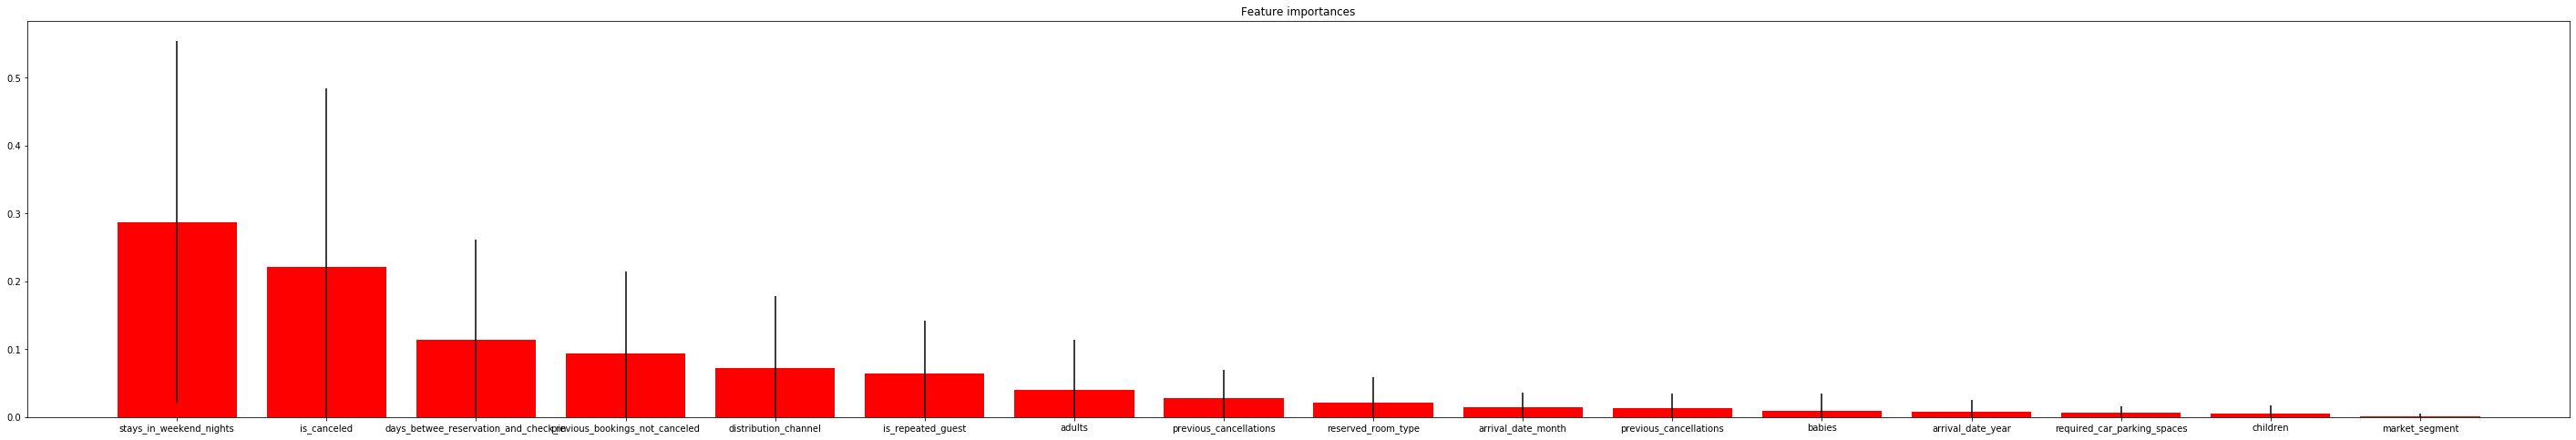

In [60]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(data2.shape[1]):
    print("%d. %s (%f)" % (f + 1, features2[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(data2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data2.shape[1]), np.array(features2)[indices])
plt.xlim([-1, data2.shape[1]])
fig.set_size_inches(50,8)
axes = plt.gca()
axes.set_ylim([0,None])

Min: -20.000000, Max: 4250.000000
(array([5.283e+03, 1.742e+03, 1.750e+02, 1.900e+01, 6.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


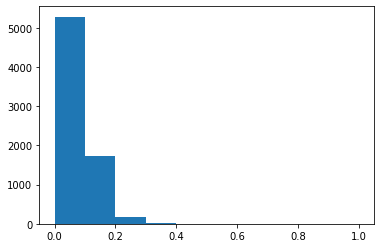

In [37]:
from sklearn.preprocessing import MinMaxScaler
# train the normalization
series=df['total_cost']
values = series.values
values = values.reshape((len(values), 1))
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print the first 5 rows
normalized = scaler.transform(values)
print(plt.hist(normalized))

In [42]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler(quantile_range = (0.1,0.9))
max(robust.fit_transform(df['total_cost'].values.reshape(-1, 1)))

array([88.39050132])

In [19]:
df.groupby('partner_ID')['total_cost'].sum().sort_values(ascending=False)

partner_ID
6     76990
15    74780
12    74680
18    74430
24    73930
27    73030
14    71850
28    70460
19    69880
11    69480
13    68530
7     68350
2     68320
4     67400
16    66840
1     66370
25    65770
8     65460
22    64030
23    64010
21    63600
29    63150
3     62880
30    62140
9     61400
20    61070
5     60450
17    60070
10    58370
26    56960
Name: total_cost, dtype: int64

In [20]:
df[df['is_canceled']==0].groupby('partner_ID')['total_cost'].sum().sort_values(ascending=False)

partner_ID
24    54330
15    53100
28    51940
12    51100
16    50950
27    50230
2     49690
11    49300
14    48540
18    48200
13    47370
7     46500
25    45970
6     45930
3     45700
8     45360
4     45240
9     45160
29    44650
19    44520
23    44090
22    43990
1     43940
30    43880
10    42700
17    42520
20    41160
5     40050
21    39350
26    38480
Name: total_cost, dtype: int64

In [21]:
df[df['is_canceled']==0].groupby('partner_ID')['total_cost'].max().sort_values(ascending=False)


partner_ID
11    4250
24    3720
30    1810
4     1770
28    1720
7     1720
18    1720
3     1540
5     1490
12    1490
2     1340
25    1310
13    1010
1     1010
21    1010
14     940
26     940
27     930
15     930
16     910
9      910
6      910
19     890
22     880
20     870
29     860
17     860
10     860
8      860
23     740
Name: total_cost, dtype: int64

In [65]:
df.groupby('partner_ID')['total_cost'].count().sort_values(ascending=False)

partner_ID
15    282
6     277
12    272
13    263
24    258
8     256
14    252
2     248
27    247
23    245
18    245
21    244
9     242
1     241
7     240
28    240
25    238
19    236
4     236
22    233
16    232
3     230
20    229
11    227
5     226
30    226
29    223
17    221
10    210
26    208
Name: total_cost, dtype: int64

In [23]:
df[df['is_canceled']==1].groupby('partner_ID')['total_cost'].max().sort_values(ascending=False)

partner_ID
4     1720
14    1560
8     1490
11    1470
1     1290
13    1290
18    1290
19    1290
21    1220
3     1150
26    1140
7     1060
6     1060
27    1060
10    1060
20     910
16     910
9      860
2      860
30     860
12     860
29     860
23     860
25     860
28     860
15     860
17     760
22     710
24     710
5      620
Name: total_cost, dtype: int64

In [127]:
df.groupby(['partner_ID','arrival_date_year'])['partner_ID'].count().sort_values(ascending=True).head(25)
#df.groupby(['partner_ID','arrival_date_month','arrival_date_year'])['partner_ID'].filter(lambda x: len(x) > 15)

partner_ID  arrival_date_year
11          2015                 36
30          2015                 41
22          2015                 42
26          2015                 42
29          2015                 44
4           2015                 44
1           2015                 45
17          2015                 45
16          2015                 46
10          2015                 47
5           2015                 49
20          2015                 50
3           2015                 50
15          2015                 50
14          2015                 51
13          2015                 51
23          2015                 52
25          2015                 53
2           2015                 53
27          2015                 53
9           2015                 53
18          2015                 57
21          2015                 58
8           2015                 58
12          2015                 59
Name: partner_ID, dtype: int64

In [133]:
df[df['arrival_date_year']==2017].groupby(['partner_ID','arrival_date_month'])['partner_ID'].sum().sort_values(ascending=False).head(40)

partner_ID  arrival_date_month
29          5                     464
30          8                     450
            6                     420
            7                     420
27          0                     405
29          1                     377
25          1                     375
23          1                     368
28          0                     364
25          0                     350
23          7                     345
24          0                     336
            7                     336
30          1                     330
27          8                     324
            6                     324
            5                     324
21          3                     315
24          6                     312
22          8                     308
28          6                     308
            5                     308
25          6                     300
18          6                     288
26          6                     286
19          5      

In [184]:
#,'arrival_date_day_of_month'
dft=df
(dft[(dft['arrival_date_year']==2017) & (dft['is_canceled']==0)].groupby(['partner_ID'])['stays_in_week_nights'].sum() + 
 (dft[(dft['arrival_date_year']==2017) & (dft['is_canceled']==0)].groupby(['partner_ID'])['stays_in_weekend_nights'].sum())).sort_values(ascending=False).head(40)

partner_ID
24    286
13    269
14    262
12    262
4     262
27    259
16    257
6     255
15    253
3     250
18    247
10    242
8     241
2     235
22    233
19    232
11    231
30    226
25    225
23    223
17    210
5     207
1     204
26    203
28    203
9     195
20    188
29    182
7     166
21    161
dtype: int64

In [185]:
(dft[(dft['arrival_date_year']==2017) & (dft['is_canceled']==1)].groupby(['partner_ID'])['stays_in_week_nights'].sum() + 
 (dft[(dft['arrival_date_year']==2017) & (dft['is_canceled']==1)].groupby(['partner_ID'])['stays_in_weekend_nights'].sum())).sort_values(ascending=False).head(40)

partner_ID
1     190
6     181
14    177
15    165
29    154
7     147
18    144
27    143
11    142
21    133
23    129
20    126
19    125
17    124
26    119
22    114
9     114
4     113
2     113
25    111
24    111
28    107
8     102
12     98
5      92
3      89
30     89
13     84
16     82
10     79
dtype: int64

In [186]:
(dft[(dft['arrival_date_year']==2017) & (dft['is_canceled']==0)].groupby(['partner_ID','arrival_date_month'])['stays_in_week_nights'].sum() + 
 (dft[(dft['arrival_date_year']==2017) & (dft['is_canceled']==0)].groupby(['partner_ID','arrival_date_month'])['stays_in_weekend_nights'].sum())).sort_values(ascending=False).head(40)

partner_ID  arrival_date_month
24          7                     81
12          7                     78
19          5                     73
25          0                     70
24          0                     64
30          7                     61
12          6                     61
3           5                     61
11          5                     59
17          0                     57
18          5                     57
16          6                     57
4           7                     57
16          1                     56
4           1                     54
27          8                     53
6           7                     52
30          6                     51
14          0                     50
5           1                     50
23          1                     49
8           8                     49
3           7                     48
25          1                     47
20          8                     46
15          0                     46
26     

In [189]:
dft[(dft['arrival_date_year']==2017) & (dft['is_canceled']==1)].groupby(['partner_ID'])['total_cost'].max()


partner_ID
1     1290
2      860
3      480
4      860
5      480
6     1060
7     1060
8     1490
9      640
10    1060
11    1470
12     670
13     530
14    1560
15     860
16     600
17     760
18    1080
19     810
20     910
21     600
22     710
23     660
24     710
25     860
26     880
27    1060
28     430
29     860
30     480
Name: total_cost, dtype: int64